## Esercizo 1
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``Dati0.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 

Per la lettura dei dati procedere nel seguente modo:

``  from scipy.io import loadmat
    import numpy as np
    dati = loadmat('Dati0.mat')
    A=dati["A"]
    b=dati["b"] ``

In [60]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import RisolviSis


In [61]:
def gauss_seidel_sor(A, b, x0, omega, toll, itmax):
    # La dichiaro per buona norma anche se Python ha scope di lettura che va anche al di fuori
    # dell'ambito della funzione
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    Dinv = np.diag(1/d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)

    # Devo introdurre un parametro omega che riduca il più possibile il raggio spettrale
    Momega = D+omega*E
    Nomega = (1-omega)*D-omega*F
    T = np.dot(np.linalg.inv(Momega), Nomega)

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. Tengo traccia del vettore
    # degli errori per poi fare un grafico rappresentativo
    M = D+E
    N = -F
    it = 0
    xold = x0.copy()
    xnew = x0.copy()
    er_vet = []

    # Imposto le condizioni di convergenza ad itmax iterate e alla quantità di errore maggiore
    # rispetto ad una determinata tolleranza. Moltiplicare per una matrice diagonale significa
    # dividere una matrice per la diagonale stessa
    while it <= itmax and errore >= toll:
        temp = b-np.dot(F, xold)
        xtilde, flag = RisolviSis.Lsolve(M, temp)
        xnew = (1-omega)*xold+omega*xtilde
        errore = np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold = xnew.copy()
        it = it+1
    return xnew, it, er_vet


(400, 400)
True
True
raggio spettrale Gauss-Seidel SOR  0.9105928708778409
Soluzione GSS:     [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]


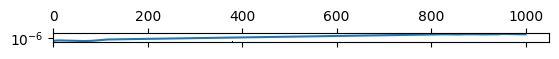

In [62]:
dati = loadmat('Dati0.mat')
A = dati["A"]
b = dati["b"]

# Vedo la forma di A
print(A.shape)

# Costruisce una immagine mettendo stelline su elementi che sono diversi da 0
plt.spy(A)

# Voglio fare una indagine su questa matrice cercando di comprenderne le caratteristiche:
# uso il criterio di Sylvester (analisi del determinante delle sottomatrici) oppure controllo
# la positività degli autovalori della matrice.
#
# print(A == A.T)
# print(np.linalg.eigvals(A))
print(np.all(A == A.T))
print(np.all(np.linalg.eigvals(A) > 0))
#
# La matrice è simmetrica, i suoi autovalori sono tutti positivi e quindi procedo risolvendo
# Steepest Descent o Gauss Siedel:
x0 = np.zeros((n, 1))
# omega deve avere un valore tra 0 e 2
omega = 1.585
itmax = 1000
toll = 1e-16
xG, itG, err_vetG = gauss_seidel_sor(A, b, x0, omega, toll, itmax)

print("Soluzione GSS:    ", xG)
print("Iterazioni GSS:   ", itG)

plt.semilogy(np.arange(itG), err_vetG)
plt.show()


## Esercizio 2

La sequenza 

$$x_1=1$$
$$x_n= 2^{n-1} \left( \sqrt{1+ \frac{x_{n-1}}{2^{n-2}} }-1 \right)    \quad \quad n=2,3,...,\quad (1) $$

converge a $log(2)$, cioè  $\lim_{n \rightarrow \infty} x_n= log(2)$

- Si calcolino i valori della sequenza (1) per $n=1,..,71$

- Costruire un grafico in cui nelle ascisse vi sia  il valore di $n=1,..,71$  e nelle ordinate il corrispondente valore di $x_n$ . 

- La successione converge a log(2)? In corrispondenza di quale $n$ si verifica un pessimo risultato? Spiegare alla luce della teoria

- Manipolando opportunamente la formula (1) scrivere una formula  equivalente  ma piu\' stabile per ottenere la sequenza $\tilde x_n$
algebricamente equivalente alla (1).

- Valutare la formula proposta per calcolare la sequenza $\tilde x_n $ per $n=1,..,71$

- Costruire un grafico in cui nelle ascisse vi sia  il valore di n  e nelle ordinate il corrispondente valore di $\tilde x_n$ 

- Calcolare l'errore relativo di ogni $x_n$ rispetto al valore esatto $log(2)$ 


- Calcolare l'errore relativo di ogni $\tilde x_n$ rispetto al valore esatto $log(2)$

## Esercizo 3
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``Dati1.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 
